In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings("ignore")

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [2]:
data=pd.read_csv('C:/Users/nourhan/Downloads/DS/diabetes.csv')


# Explore Data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.duplicated().sum()

0

# Analysis

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

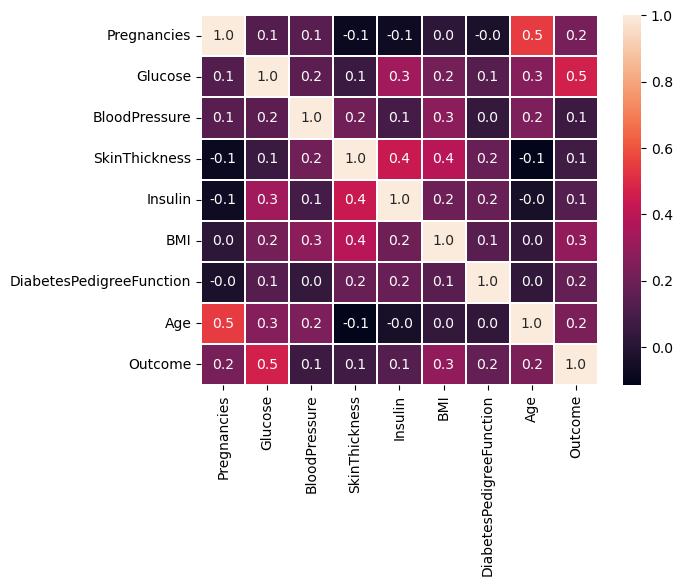

In [8]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidth=.2)

<Axes: xlabel='Outcome', ylabel='count'>

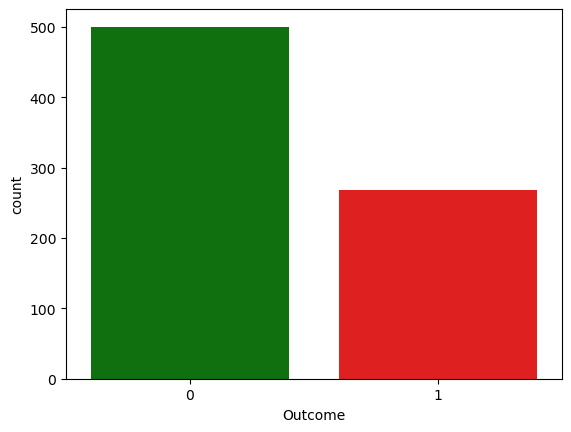

In [9]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

In [10]:
maxi=data[data["Outcome"]==0]
mini=data[data["Outcome"]==1]
maxi.shape,mini.shape
268/(500+268)

0.3489583333333333

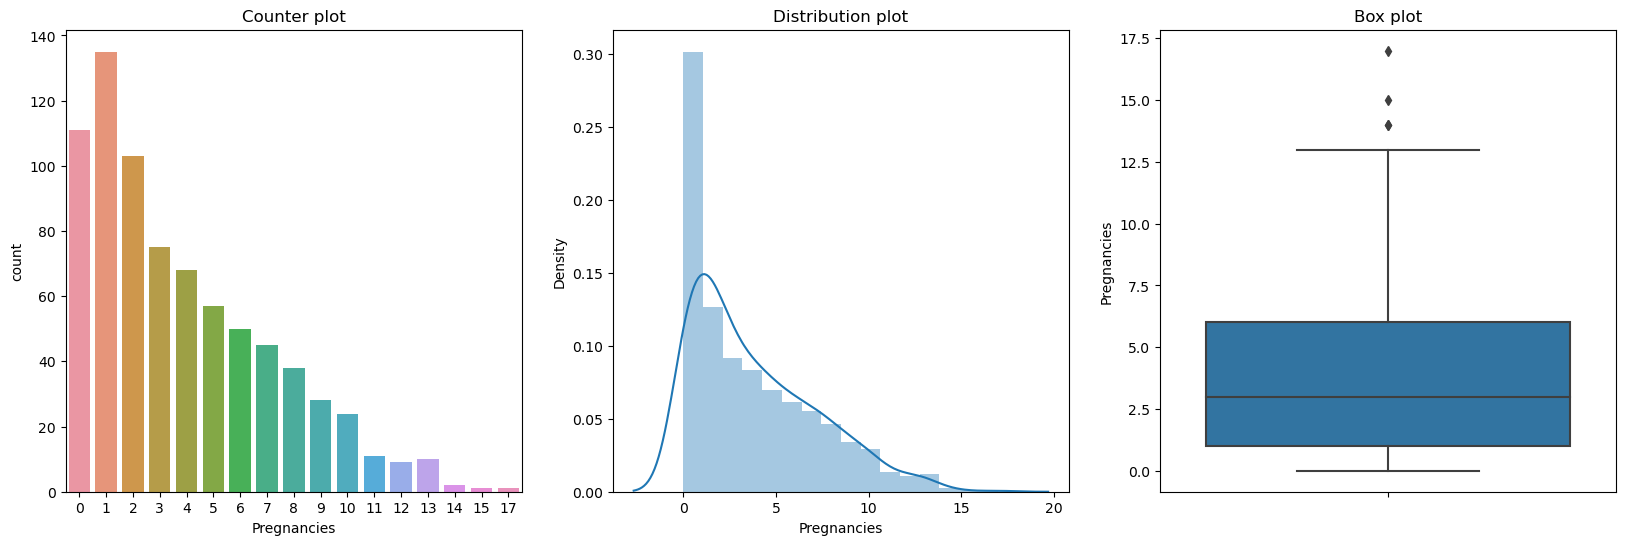

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Counter plot")
sns.countplot(x="Pregnancies",data=data)

plt.subplot(1,3,2)
plt.title("Distribution plot")
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title("Box plot")
sns.boxplot(y=data["Pregnancies"])
plt.show()

<Axes: >

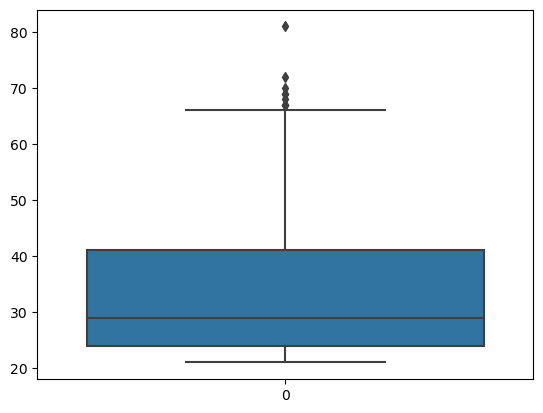

In [12]:
sns.boxplot(data.Age)

# Model

In [13]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']


In [14]:
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=41)

In [16]:
m1= LogisticRegression()
m2=SVC()
m3=RandomForestClassifier(n_estimators=100,class_weight='balanced')
m4=GradientBoostingClassifier(n_estimators=1000)

In [17]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

LogisticRegression()
accuracy is: 0.7792207792207793 recall is:  0.7692307692307693 f1  0.6382978723404256


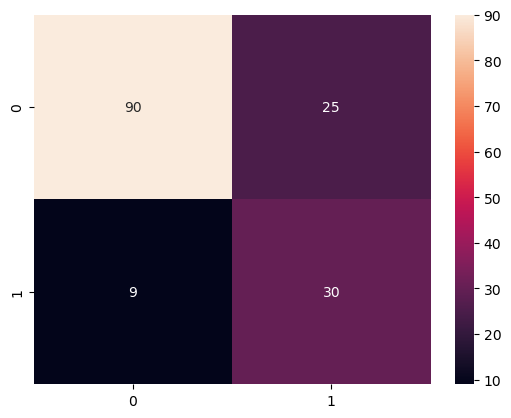

In [18]:
def cal(m):
    m.fit(x_train,y_train)
    pre=m.predict(x_test)
    accuracy =accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test) 
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(m)
    print('accuracy is:',accuracy,'recall is: ',recall,"f1 ",f1)
cal(m1)

SVC()
accuracy is: 0.7597402597402597 recall is:  0.7368421052631579 f1  0.6021505376344086


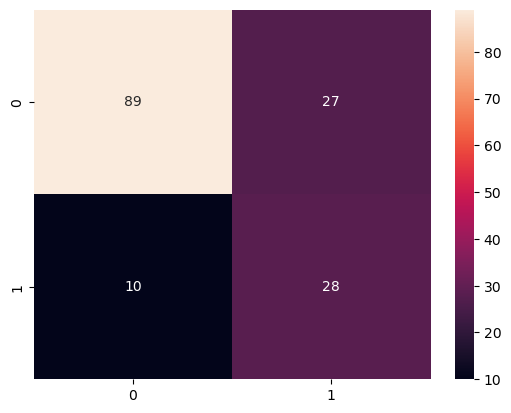

In [19]:
cal(m2)

RandomForestClassifier(class_weight='balanced')
accuracy is: 0.7662337662337663 recall is:  0.7111111111111111 f1  0.64


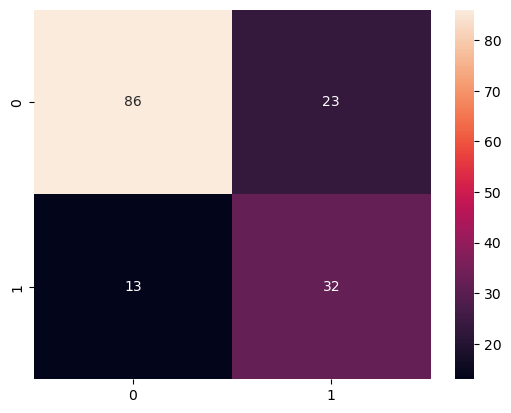

In [20]:
cal(m3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is: 0.7597402597402597 recall is:  0.6666666666666666 f1  0.6605504587155964


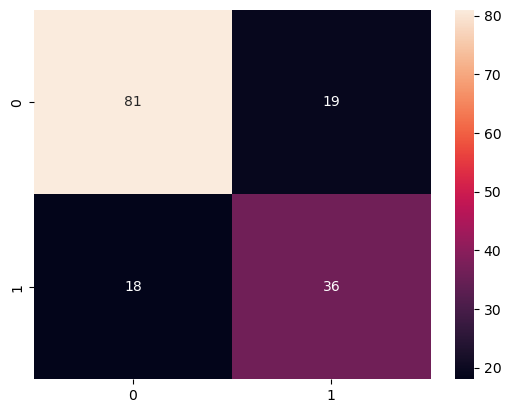

In [21]:
cal(m4)

In [22]:
result1

[0.7792207792207793,
 0.7597402597402597,
 0.7662337662337663,
 0.7597402597402597]

In [23]:
result2

[0.7692307692307693,
 0.7368421052631579,
 0.7111111111111111,
 0.6666666666666666]

In [24]:
f_res=pd.DataFrame({'Algorithms':columns,'Accuracy':result1,'Recall':result2,'f1':result3})

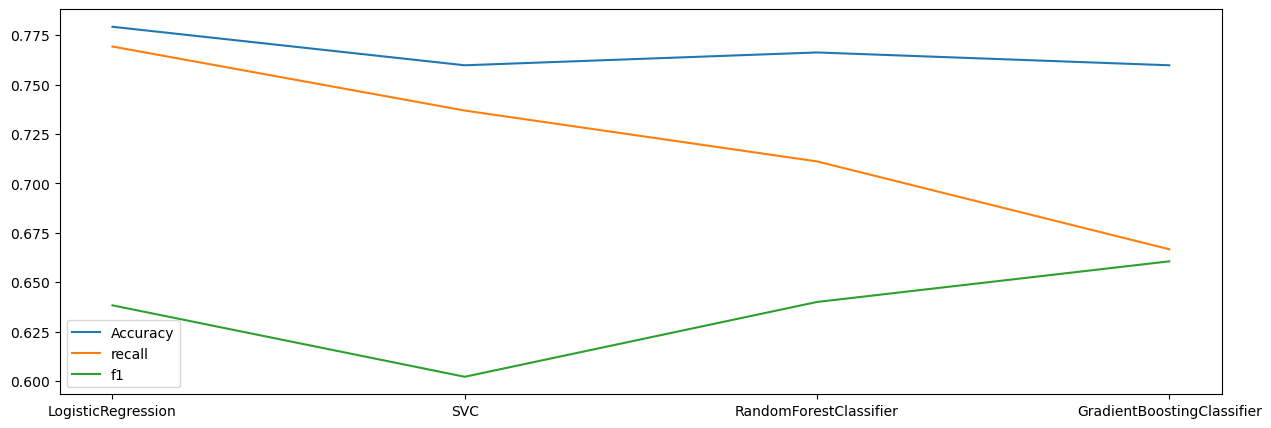

In [25]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(f_res.Algorithms,result1,label='Accuracy')
plt.plot(f_res.Algorithms,result2,label="recall")
plt.plot(f_res.Algorithms,result3,label='f1')
plt.legend()
plt.show()

In [26]:
f_res

,Algorithms,Accuracy,Recall,f1
0,LogisticRegression,0.779221,0.769231,0.638298
1,SVC,0.759740,0.736842,0.602151
2,RandomForestClassifier,0.766234,0.711111,0.640000
3,GradientBoostingClassifier,0.759740,0.666667,0.660550
